# Exercise 1

In [1]:
import pandas as pd
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import *

# Init plotly for notebook usage
init_notebook_mode(connected=True)

## Warmup: Identity matrix

In [2]:
np.identity(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

# Linear regression with one variable

## Read in data CSV

In [3]:
# Read sample CSV
df = pd.read_csv('machine-learning-ex1/ex1/ex1data1.txt', names=['x', 'y'])
orig_X = df.iloc[:, [0]].values # get x data
Y = df.iloc[:, [1]].values # get y data

# Add a column of 1's to X
one = np.ones((orig_X.size, 1))
X = np.append(one, orig_X, axis=1)
theta = np.zeros((2,1))

Read in dample CSV data using panda and convert it to a numpy array.

Once we have done this create a numpy array of one's and add that to the X data set.

## Cost function

In [4]:
def compute_cost(x, y, theta):
    dot_prod = x@theta
    return 1 / (2 * y.size) * np.sum(np.square(dot_prod - y))

J = compute_cost(X, Y, theta)
print('With theta = [0 ; 0]\nCost computed = {}'.format(J))
print('Expected cost value (approx) 32.07')
J = compute_cost(X, Y, np.array([[-1], [2]]))
print('With theta = [-1 ; 2]\nCost computed = {}'.format(J))
print('Expected cost value (approx) 54.24')

With theta = [0 ; 0]
Cost computed = 32.072733877455676
Expected cost value (approx) 32.07
With theta = [-1 ; 2]
Cost computed = 54.24245508201238
Expected cost value (approx) 54.24


Implement the following formula as the cost function

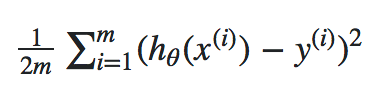

## Cost & Gradient Descent

In [5]:
def gradient_descent(x, y, theta, alpha=0.01, iterations=1500):
    i = 1
    while i <= iterations:
        dot_prod = x@theta    
        theta = theta - alpha * (1 / y.size) * x.T@(dot_prod - y)
        i += 1
    return theta

# Run gradient descent
theta = gradient_descent(X, Y, theta)
print('Theta found by gradient descent:')
print('{}'.format(theta))
print('Expected theta values (approx)')
print('-3.6303\n1.1664')

Theta found by gradient descent:
[[-3.63029144]
 [ 1.16636235]]
Expected theta values (approx)
-3.6303
1.1664


Implement graient descent function using the following formula:

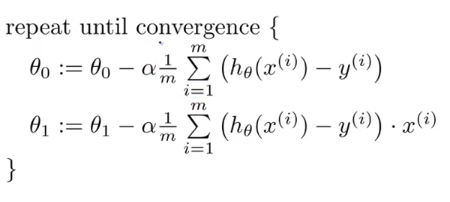

## Build graph

In [6]:
def plot_linear(orig_X, X, Y, theta):
    # Build linear plot
    linear_data = np.concatenate((orig_X, X@theta), axis=1).T
    
    # Build data for graph    
    plot_data = np.concatenate((orig_X, Y), axis=1).T
    
    # Build scatter plot
    trace0 = Scatter(
        x=plot_data[0],
        y=plot_data[1],
        mode='markers'
    )
    # Build linear plot
    trace1 = Scatter(
        x=linear_data[0],
        y=linear_data[1]
    )
    data = [trace0, trace1]
    
    #Configure plot apperance
    layout = Layout(
        xaxis=dict(
            title='Population of City in 10,000s'
        ),
        yaxis=dict(
            title='Profit in $10,000s'
        )
    )
    
    # Plot the graph
    iplot(dict(data=data, layout=layout))

plot_linear(orig_X, X, Y, theta)

## Predict

In [7]:
predict1 = [1, 3.5]@theta
print('For population = 35,000, we predict a profit of {}'.format(predict1*10000))
predict2 = [1, 7]@theta
print('For population = 70,000, we predict a profit of {}'.format(predict2*10000))

For population = 35,000, we predict a profit of [4519.7678677]
For population = 70,000, we predict a profit of [45342.45012945]


## Surface plot

In [8]:
def plot_surface(x, y):
    theta0_vals = np.linspace(-10, 10, 100)
    theta1_vals = np.linspace(-1, 4, 100)
    J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))
    
    i = 0
    j = 0
    while i < len(theta0_vals):
        while j < len(theta1_vals):
            t = np.array([[theta0_vals[i]], [theta1_vals[j]]])
            J_vals[i, j] = compute_cost(x, y, t)
            j += 1
        j = 0
        i += 1
            
    data = [
        Surface(z=J_vals, x=theta0_vals, y=theta1_vals)
    ]
    
    # Plot the graph
    iplot(dict(data=data))

plot_surface(X, Y)

## Contour

In [9]:
def plot_contour(x, y, theta):
    theta0_vals = np.linspace(-10, 10, 100)
    theta1_vals = np.linspace(-1, 4, 100)
    J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))
    
    i = 0
    j = 0
    while i < len(theta0_vals):
        while j < len(theta1_vals):
            t = np.array([[theta0_vals[i]], [theta1_vals[j]]])
            J_vals[i, j] = compute_cost(x, y, t)
            j += 1
        j = 0
        i += 1
    
    data = [
        Contour(
                z=J_vals, 
                x=theta0_vals, 
                y=theta1_vals,
                colorscale='Jet',
                contours=dict(
                    coloring='lines',
                    start = 0.0001,
                    end = 1000,
                    size = 65
                )
        ),
        Scatter(
            x=theta[0],
            y=theta[1]
        )
    ]
    
    # Plot the graph
    iplot(dict(data=data))

plot_contour(X, Y, theta)